In [35]:
import numpy as np
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, Dropout, Activation, SimpleRNN, GRU, LSTM
from keras.layers import GlobalMaxPooling1D, Embedding, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [5]:
train_df = pd.read_csv('unsmile_train_new.csv')
train_df

,문장,target
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1
...,...,...
22527,마음의 미동을주고싶은데마음먹은듯한데 어떻게서든 돌리고싶습니다도와주세요,0
22528,그엄마가 그엄마는 아니겠지,0
22529,연락안한지 3일됬는데..너무 __ 즉흥적으로 질러버린거같아요..,0
22530,엄마아빠가 이해해주실까요?,0


In [6]:
test_df = pd.read_csv('unsmile_valid_new.csv')
test_df

,문장,target
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,1
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,1
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,1
4,바지 내리다 한남들 와꾸 보고 올려뿟노,1
...,...,...
5599,멀 어떻게 해야되요??,0
5600,프로필사진에는 아랍인처럼 안생겼던데..,0
5601,난 뭔가 좀 불안한데... 이렇게 잘하다가 한순간 못하면 지금까지 넣은 골같은건 상...,0
5602,벌써 4시를 향해가고 있음...,0


In [7]:
X_train = train_df['문장'].values
y_train = train_df['target'].values

X_test = test_df['문장'].values
y_test = test_df['target']

In [8]:
# Tokenizer
tokenizer = Tokenizer()

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])


[[15891, 8487, 15892, 2031, 1284], [15893, 15894, 15895, 15896, 758, 1781, 2787, 191, 8488, 15897, 1018, 15898, 15899, 3388, 3389, 15900, 15901, 2], [15902, 15903, 15904, 2032, 8489, 8490, 2788, 249, 15905, 2353, 8491, 1, 15906, 86, 15907], [15908, 15909, 5701, 40, 15910, 116, 76, 15911, 2789, 15912, 1583, 2790], [3390, 3, 359, 15913, 2, 470, 4319, 406, 8492, 574, 5, 5702, 3391, 54, 15914, 15915, 36, 544, 2033, 307, 930, 123, 13, 2791, 2792, 345]]


In [10]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'진짜': 1, '다': 2, '왜': 3, 'ㅋㅋ': 4, '더': 5, '그냥': 6, 'ㅋㅋㅋ': 7, '너무': 8, '존나': 9, '정말': 10, '좀': 11, '이': 12, '그': 13, '저': 14, 'ㅋㅋㅋㅋ': 15, '근데': 16, '잘': 17, '씨발': 18, '시발': 19, '수': 20, '또': 21, '감사합니다': 22, '난': 23, '하는': 24, '안': 25, 'ㅋ': 26, '역시': 27, '많이': 28, '있는': 29, '무슨': 30, '하고': 31, '저런': 32, '아': 33, '아니라': 34, '참': 35, '내가': 36, '이기야': 37, '새끼들': 38, '이런': 39, '뭐': 40, '와': 41, 'ㅋㅋㅋㅋㅋ': 42, '그리고': 43, '이제': 44, '전라도': 45, '항상': 46, '지금': 47, '보면': 48, 'ㄹㅇ': 49, '좋은': 50, '같은': 51, '어떻게': 52, '여자': 53, '이렇게': 54, '거': 55, '보고': 56, '얼마나': 57, '나도': 58, '제발': 59, '걍': 60, '없다': 61, '요즘': 62, '하면': 63, 'ㅠㅠ': 64, '할': 65, 'ㅎㅎ': 66, 'ㅋㅋㅋㅋㅋㅋ': 67, '내': 68, '우리': 69, '것': 70, '이게': 71, '그럼': 72, '한': 73, '그렇게': 74, '아니': 75, '이거': 76, '누가': 77, '저렇게': 78, '아니냐': 79, '저거': 80, '한다': 81, '그래도': 82, '없는': 83, '아니고': 84, '오늘': 85, '꼭': 86, '이기': 87, '뭔': 88, '다른': 89, '돈': 90, '솔직히': 91, '나라': 92, '있다': 93, '나': 94, '화이팅': 95, '같이': 96, '한남': 97, '지': 98, '절대': 99, '다시': 100, '여자가': 

In [11]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 68171
단어 집합(vocabulary)에서 희귀 단어의 비율: 81.09706046799347
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 39.87284393259676


In [12]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 84062


최대 길이 : 41
평균 길이 : 7.587919


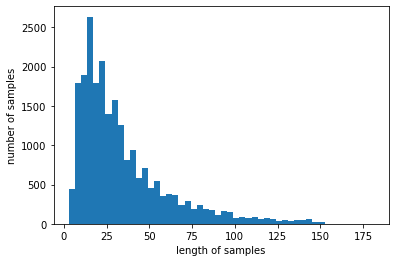

In [13]:
print('최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [14]:
max_len = 50
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (22532, 50)


In [27]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5
hidden_units = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPool1D())
model.add(LSTM(hidden_units))
# model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
282/282 [==============================] - 10s 28ms/step - loss: 0.5970 - acc: 0.6778 - val_loss: 0.7853 - val_acc: 0.5349
Epoch 2/10
282/282 [==============================] - 7s 26ms/step - loss: 0.3105 - acc: 0.8767 - val_loss: 0.7817 - val_acc: 0.6636
Epoch 3/10
282/282 [==============================] - 8s 28ms/step - loss: 0.0881 - acc: 0.9777 - val_loss: 0.8249 - val_acc: 0.7049
Epoch 4/10
282/282 [==============================] - 8s 27ms/step - loss: 0.0312 - acc: 0.9961 - val_loss: 0.9910 - val_acc: 0.6832
Epoch 5/10
282/282 [==============================] - 8s 27ms/step - loss: 0.0165 - acc: 0.9983 - val_loss: 0.9596 - val_acc: 0.7162
Epoch 6/10
282/282 [==============================] - 8s 27ms/step - loss: 0.0108 - acc: 0.9992 - val_loss: 1.2600 - val_acc: 0.6550
Epoch 7/10
282/282 [==============================] - 8s 28ms/step - loss: 0.0081 - acc: 0.9994 - val_loss: 0.9642 - val_acc: 0.7411
Epoch 8/10
282/282 [==============================] - 8s 27ms/step -

In [28]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

176/176 [==============================] - 0s 2ms/step - loss: 1.0479 - acc: 0.7446

 테스트 정확도: 0.7446


In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_test_padded, y_test)
# roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) 
AUC = roc_auc_score(y_test, clf.decision_function(X_test_padded))

pred = model.predict(X_test_padded)
accuracy = accuracy_score(y_test,np.round(abs(pred)))
precision = precision_score(y_test,np.round(abs(pred)))
f1 = f1_score(y_test,np.round(abs(pred)))

print("accuracy : ",round(accuracy,4))
print("precision_score : ",round(precision,4))
print("AUC : ", round(AUC,4))
print("f1_score : ",round(f1,4))

accuracy :  0.7446
precision_score :  0.7461
AUC :  0.6308
f1_score :  0.7439
